# Watershed Project - Mapping Floodplain Connectivity in Boulder County
![Watershed Project](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/South_Boulder_Creek_%28Colorado%29.JPG/1920px-South_Boulder_Creek_%28Colorado%29.JPG)

*Img source: 
Wikimedia Foundation. (2022, September 4). South Boulder creek (Colorado). Wikipedia. https://en.wikipedia.org/wiki/South_Boulder_Creek_(Colorado)

## Collaborators and Acknowledgements
Julia Sobczak, Lindsay Chipman, Matthew Bitters, and the [Watershed Center](https://watershed.center/)

Spring project for the University of Colorado Earth Data Analytics program, [Earth Lab](https://www.earthdatascience.org/)

In [1]:
# Import packages
# Make sure you have RiverREM imported, check readme for instructions
import os
import pathlib

import matplotlib.pyplot as plt
from load_plot_model import load_dtm, plot_model
from plot_site_map import plot_sites, plot_sites_folium
from riverrem.REMMaker import REMMaker, clear_osm_cache
import requests
import rioxarray as rxr

In [2]:
# Set working directory
working_dir = os.path.join(
    pathlib.Path.home(), 'earth-analytics', 'data', 'watershed-project')

# Try/Except Block   
try:
    os.chdir(working_dir)
except:
    print('{} does not exist. Creating...'.format(working_dir))
    os.makedirs(working_dir)
    os.chdir(working_dir)
else:
    print('{} is now the working directory'.format(working_dir))

/Users/lchipman/earth-analytics/data/watershed-project is now the working directory


# Plot Study Sites
The study sites are five streams in the St. Vrain Watershed, Boulder County: 

Apple Valley North, Hall Meadows, Highway 93, Legacy 1, Van Vleet

In [ ]:
# Plot the study sites, method 1 - find related code in plot_site_map
plot_sites()

In [ ]:
# Plot the study sites, method 2 - find related code in plot_site_map
plot_sites_folium()

# Plot DTM of Highway 93 Site 

In [3]:
# Define urls for model data downloads
# Starting with hwy 93, but repeat with new sites as data is added
hwy_93_url = ("https://github.com/lechipman/watershed-project/releases"
              "/download/v1.0.0/DTM_Highway93.tif")

In [4]:
# Create dataarray for hwy 93 site DTM
dtm = load_dtm(data_url = hwy_93_url, 
                          site_name = 'uav_hwy93',
                          file_name = 'DTM_Highway93.tif')

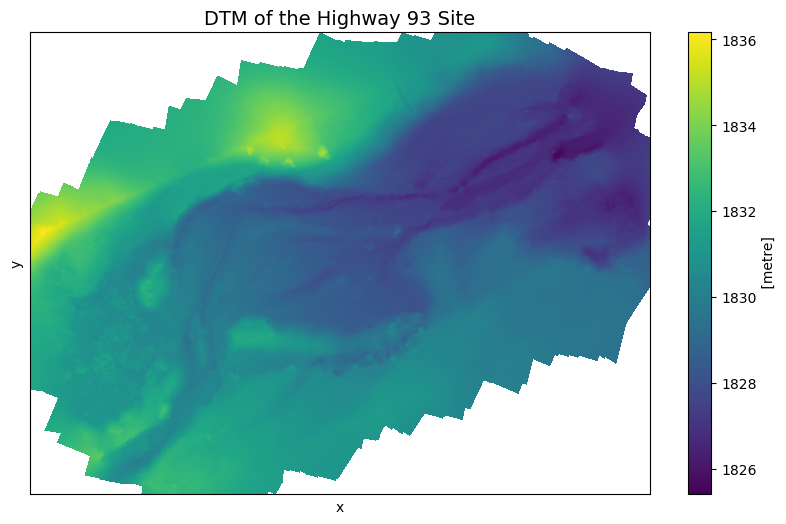

In [5]:
# Plot the hwy 93 DTM
plot_model(model = dtm, 
           title = 'DTM of the Highway 93 Site', 
           coarsen = True)

# Run REMMaker tool using DTM as input

In [ ]:
# Run rem_maker without specified centerline
# Input the DEM file path and desired output directory
override_cache = False
dtm_dir = 'uav_hwy93'
dtm_path = os.path.join(dtm_dir, 'DTM_Highway93.tif')
rem_path = os.path.join(dtm_dir, 'DTM_Highway93_REM.tif')

# Run the REMMaker if the path to the REM does not already exist
if (not os.path.exists(rem_path)) or override_cache:
    rem_maker = REMMaker(dem=dtm_path, out_dir=dtm_dir, interp_pts=1000)

    # clear OSM cache
    clear_osm_cache()

    # create an REM
    rem_maker.make_rem()

    # create an REM visualization with the given colormap
    rem_maker.make_rem_viz(cmap='mako_r')

else:
    print('The REM already exists. Not running REMMaker')

# Plot REM of Highway 93 Site

In [ ]:
# Open and plot the REM you just generated
rem_path = os.path.join(dtm_dir, 'DTM_Highway93_REM.tif')
rem = rxr.open_rasterio(rem_path, masked=True)

plot_model(model = rem, 
           title = 'REM derived from UAV Imagery', 
           coarsen = True)

# Plot REM Histogram¶

In [ ]:
# Function to plot a histogram of the REM 
def plot_hist(model, title, color):
    """Creates a Histogram of Elevation Model Data
    
    Parameters
    ----------
    model: dataarray
        The dataarray to plot.

    title: str
        The title of the plot.
        
    color: str
        Desired color of the plot.
        
    Returns
    -------
    The histogram of the elevation model with specified title and color.
    """

    # Create REM histogram plot 
    fig, ax = plt.subplots(figsize=(10, 6))
    model.plot.hist(color=color, bins=20)
    ax.set_title(title)
    plt.show()

In [ ]:
# Call function to plot histogram of REM
plot_hist(model=rem, 
          title="Histogram of the REM Data, Highway 93 Site", 
          color="cyan")

## Export Notebook to HTML File

In [ ]:
# Move to the local repository directory where this notebook is saved
repo_dir = os.path.join(
    pathlib.Path.home(), 'earth-analytics', 'watershed-project')
try:
    os.chdir(repo_dir)
except:
    print('{} does not exist. Please make sure you forked the watershed'
          'repository to the correct location. See README' 
          'for instructions'.format(repo_dir))
else:
    print('Changed directory to {}'.format(repo_dir))
    !jupyter nbconvert --to html --no-input watershed_project_summer23.ipynb